In [75]:
import cmath 
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

class Runge_Kutta_4(ABC):
    def __init__(self, function=None, initial_y=None, discretization=0.01, interval=1., is_function_depends_on_x=False):
        """
        :param function: np.array, матрица ДУ
        :param discretization: float, шаг интегрирования
        :param interval: float, интервал интегрирования
        :param initial_y: np.array, начальные условия
        """
        self.function = function if function is not None else []
        self.discretization = discretization
        self.interval = interval
        self.initial_y = initial_y if initial_y is not None else []
        self.is_function_depends_on_x = is_function_depends_on_x
        self.computations_complited = False
        
    @abstractmethod
    def get_function(self, x):
        """
        :param x: float, координата x
        """
        pass
    
    @abstractmethod
    def save_y(self, y):
        pass
    
    @abstractmethod
    def load_y(self):
        pass
    
    def get_derivative(self, function, y):
        """
        :param function: np.array, функция ДУ
        :param psi: np.array, значение вектора y
        """
        return function @ y
    
    def run(self):
        
        N = int(self.interval / self.discretization) + 1
        y = [self.initial_y for _ in range(N)]
        y[0] = self.initial_y
        x_range = [i * self.discretization for i in range(N)]
        h = self.discretization

        for n in range(N - 1):
            x_n = x_range[n]
            
            if self.is_function_depends_on_x:
                function_n = self.get_function(x_n)
                function_n_half_h = self.get_function(x_n + h / 2)
                function_n_h = self.get_function(x_n + h)
            else:
                function = self.function
                function_n_half_h = self.function
                function_n_h = self.function
                
            k_1 = self.get_derivative(function, y[n]) 
            k_2 = self.get_derivative(function_n_half_h, y[n] + k_1 * h / 2)
            k_3 = self.get_derivative(function_n_half_h, y[n] + k_2 * h / 2)
            k_4 = self.get_derivative(function_n_h, y[n] + k_3 * h)
            
            y[n + 1] = y[n] + h / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
        
        self.computations_complited = True
        
        y = np.array(y)
        self.save_y(y)
    
        return y
    
class Shredinger_equation(Runge_Kutta_4):
    def __init__(self, hamiltonian=None, is_hamiltonian_depends_on_t=False, h_pi=1):
        """
        :param hamiltonian: np.array, Гамильтониан системы
        :param h_pi: float, постоянная Планка, деленная на 2pi
        """
        super().__init__()
        self.is_function_depends_on_x = is_hamiltonian_depends_on_t
        self.hamiltonian = hamiltonian if hamiltonian is not None else []
        self.h_pi = h_pi
        self.function = - complex(0, 1) / self.h_pi * self.hamiltonian
        
    def get_function(self, x):
        """
        :param x: float, координата x
        """
        pass
    
    def save_y(self, y):
        """
        :param y: np.array, вектор-функция
        """
        np.savetxt(f'{self.initial_y}_Shredinger_equation_Runge_Kutta_4.txt', y.view(float))
        return y
    
    def load_y(self):
        y = np.loadtxt(f'{self.initial_y}_Shredinger_equation_Runge_Kutta_4.txt').view(complex)
        return y
    
    def draw_psi_plot(self):
        if not self.computations_complited:
            raise
        plt.figure(figsize=(10, 8))
        legend = []
        colors = ['purple', 'b', 'dodgerblue', 'k', 'grey', 'r']
        psi = self.load_y()
        t = [i * self.discretization for i in range(len(psi))]
        for num_dim in range(len(self.initial_y)):
            plt.plot(t, psi[:, num_dim].real, marker ='o', c = colors[num_dim])
            legend.append(f'psi_{num_dim}_real')
            
            plt.plot(t, psi[:, num_dim].imag, marker ='.', c = colors[num_dim])
            legend.append(f'psi_{num_dim}_imag')



        plt.legend(legend, loc="lower right", fontsize=15)
        plt.grid()
        plt.show()
        
        return plt
        
    def get_aver_operator(self, operator):
        """
        :param operator: np.array, оператор, для которого считаем среднее
        """
        if not self.computations_complited:
            raise

        psi = self.load_y()
        aver = [np.conj(psi[i]) @ operator @ psi[i] for i in range(len(psi))]
        
        return np.array(aver)
    
    def get_sum_of_abs(self):
        psi = self.load_y()
        up = np.abs(psi[:, 0])
        down = np.abs(psi[:, 1])
        return up * up + down * down
          
        
class Linear_Eq(Runge_Kutta_4):
    def __init__(self):
        super().__init__()
        
    def get_function(self, x):
        """
        :param x: float, координата x
        """
        pass
    
    def save_y(self, y):
        pass

    def load_y(self):
        pass
    
    
        
    

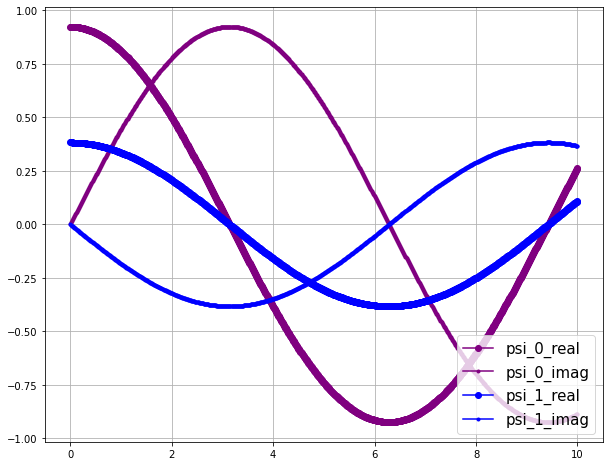

errors: 
 |S|:  2.1660451210441497e-13 
 <H>:  2.165157500524926e-13 
 (S_z):  2.165157500525395e-13 
 (sum of probabilities):  2.1660451210441497e-13 



In [89]:
gamma = 1
H_z = 1
hamiltonian = np.array([[-0.5 * gamma * H_z, 0], 
                       [0, 0.5 * gamma * H_z]])
initial_psi = np.array([np.cos(np.pi / 8), np.sin(np.pi / 8)])
Problem = Shredinger_equation(hamiltonian=hamiltonian, h_pi=1)
Problem.initial_y = initial_psi
Problem.discretization = 0.01
Problem.interval = 10.
Problem.run()
Problem.draw_psi_plot()

aver_H = Problem.get_aver_operator(hamiltonian).real
sum_of_abs = Problem.get_sum_of_abs()

imaginary = complex(0, 1)
sigma_x = np.array([[0, 1],[1, 0]])
sigma_y = np.array([[0, -imaginary],[imaginary, 0]])
sigma_z = np.array([[1, 0],[0, -1]])

S_x = Problem.get_aver_operator(sigma_x / 2)
S_y = Problem.get_aver_operator(sigma_y / 2)
S_z = Problem.get_aver_operator(sigma_z / 2)
abs_S = np.sqrt(S_x * S_x + S_y * S_y + S_z * S_z)

H_error = (max(aver_H) - min(aver_H)).real / min(aver_H).real
sum_of_abs_error = (max(sum_of_abs) - min(sum_of_abs)) / min(sum_of_abs)
S_z_error = (max(S_z) - min(S_z)).real / min(S_z).real
abs_S_error = (max(abs_S) - min(abs_S)).real / min(abs_S).real
print('errors: \n', '|S|: ', abs(abs_S_error), '\n',
     '<H>: ', abs(H_error), '\n', 
      '(S_z): ', abs(S_z_error), '\n',
      '(sum of probabilities): ', abs(sum_of_abs_error), '\n')

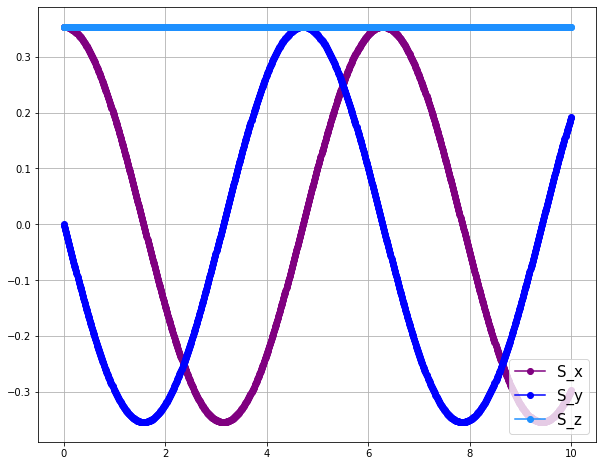

In [80]:
imaginary = complex(0, 1)
sigma_x = np.array([[0, 1],[1, 0]])
sigma_y = np.array([[0, -imaginary],[imaginary, 0]])
sigma_z = np.array([[1, 0],[0, -1]])

S_x = Problem.get_aver_operator(sigma_x / 2)
S_y = Problem.get_aver_operator(sigma_y / 2)
S_z = Problem.get_aver_operator(sigma_z / 2)

plt.figure(figsize=(10, 8))
legend = []
colors = ['purple', 'b', 'dodgerblue', 'k', 'grey', 'r']
t = [i * Problem.discretization for i in range(len(S_x))]

plt.plot(t, S_x.real, marker ='o', c = colors[0])
legend.append('S_x')
plt.plot(t, S_y.real, marker ='o', c = colors[1])
legend.append('S_y')
plt.plot(t, S_z.real, marker ='o', c = colors[2])
legend.append('S_z')

plt.legend(legend, loc="lower right", fontsize=15)
plt.grid()
plt.show()

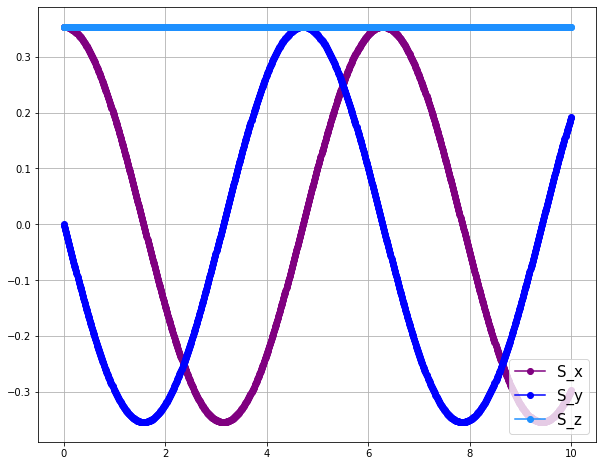

In [79]:
x = Linear_Eq()
x.function = np.array([[0, 1, 0],[-1, 0, 0],[0, 0, 0]])
x.initial_y = np.array([1 / np.sqrt(8), 0 , 1 / np.sqrt(8)])
x.discretization = 0.01
x.interval = 10.
ans = x.run()

plt.figure(figsize=(10, 8))
legend = []
colors = ['purple', 'b', 'dodgerblue', 'k', 'grey', 'r']
t = [i * Problem.discretization for i in range(len(ans[:, 0]))]

plt.plot(t, ans[:, 0], marker ='o', c = colors[0])
legend.append('S_x')
plt.plot(t, ans[:, 1], marker ='o', c = colors[1])
legend.append('S_y')
plt.plot(t, ans[:, 2], marker ='o', c = colors[2])
legend.append('S_z')

plt.legend(legend, loc="lower right", fontsize=15)
plt.grid()
plt.show()